
## Librerias

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import random
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de dataset

In [8]:
data = np.load('C:\\Users\\Best Computer\\Desktop\\Juan Erick Sr\\MaestriaCienciaDeDatos\\CienciaDeDatosConPython\\Proyecto\\proyecto_training_data.npy')


## Partición de base de datos en 80% entranamiento y 20% validación/test

In [10]:
np.random.seed(19810523)
idx_train = random.sample(range(len(data)), int(len(data)*.8))
idx_test = list(set(range(len(data))) - set(idx_train))

data_train = pd.DataFrame(data[idx_train,:])
data_train.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
data_train['grupo'] = 'training'

data_test = pd.DataFrame(data[idx_test,:])
data_test.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
data_test['grupo'] = 'test'

dataset = data_train.append(data_test, ignore_index=True)


## Análsis exploratorio de datos

### datos faltantes

In [14]:

dataset.isna().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
grupo             0
dtype: int64

### dataset total

In [12]:
eda = dataset.describe()
eda

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


### dataset entrenamiento

In [16]:
eda_train = dataset[dataset['grupo'] == 'training'].describe()
eda_train

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,960.000000
mean,180465.444349,6.106164,1154.262842,6.496575,1971.249144,69.110417
std,79255.069134,1.383225,369.103029,1.609735,30.058277,22.705172
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129500.000000,5.000000,876.000000,5.000000,1954.000000,59.000000
50%,163250.000000,6.000000,1079.500000,6.000000,1973.000000,68.500000
75%,213500.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


### dataset validación / test

In [17]:
eda_test = dataset[dataset['grupo'] == 'test'].describe()
eda_test

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,241.000000
mean,182744.202055,6.071918,1196.082192,6.602740,1971.342466,73.792531
std,80298.930522,1.384114,448.941099,1.686736,30.826850,29.516071
min,52500.000000,2.000000,438.000000,3.000000,1880.000000,21.000000
25%,132875.000000,5.000000,893.500000,5.000000,1952.000000,60.000000
50%,163000.000000,6.000000,1113.000000,6.000000,1972.000000,70.000000
75%,214600.000000,7.000000,1393.750000,8.000000,2001.000000,84.000000
max,555000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


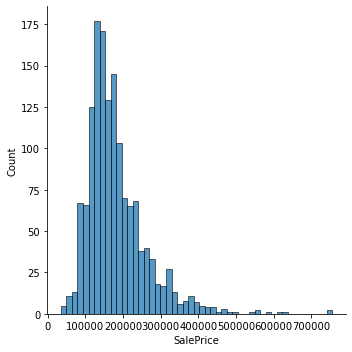

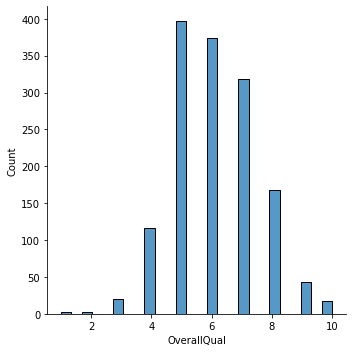

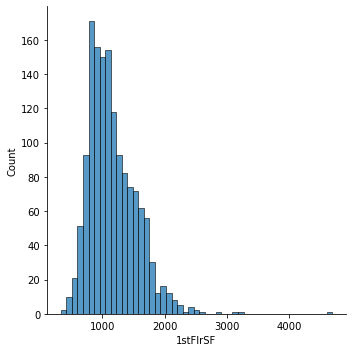

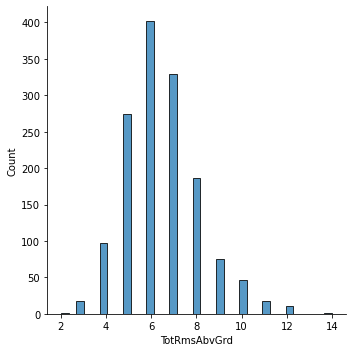

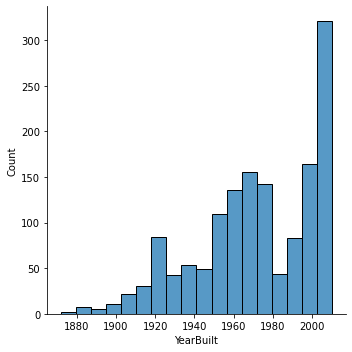

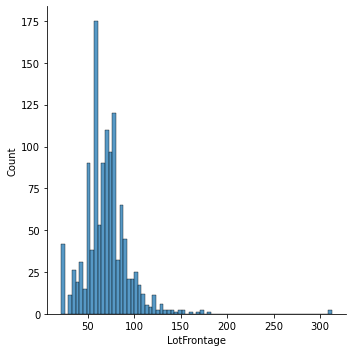

In [23]:
sns.displot(dataset['SalePrice']) 
sns.displot(dataset['OverallQual'])
sns.displot(dataset['1stFlrSF'])
sns.displot(dataset['TotRmsAbvGrd'])
sns.displot(dataset['YearBuilt'])
sns.displot(dataset['LotFrontage'])

Text(0.5, 1.0, 'La correlación es 0.791')

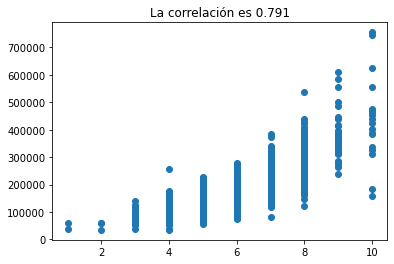

In [26]:
plt.scatter(x='OverallQual', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["OverallQual"])[0],3)}')


Text(0.5, 1.0, 'La correlación es 0.606')

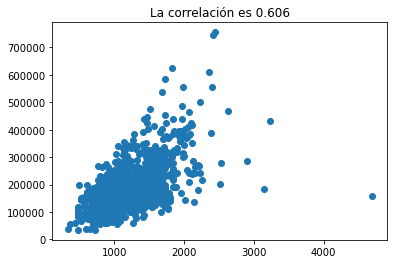

In [27]:
plt.scatter(x='1stFlrSF', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["1stFlrSF"])[0],3)}')


Text(0.5, 1.0, 'La correlación es 0.534')

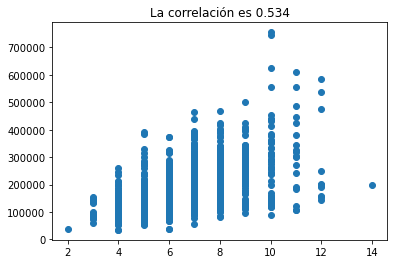

In [28]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["TotRmsAbvGrd"])[0],3)}')


Text(0.5, 1.0, 'La correlación es 0.523')

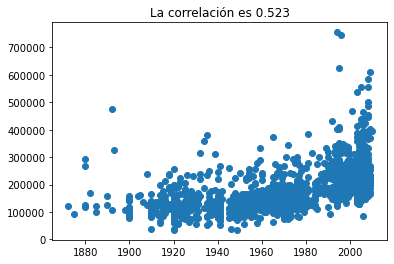

In [29]:
plt.scatter(x='YearBuilt', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["YearBuilt"])[0],3)}')


Text(0.5, 1.0, 'La correlación es 0.352')

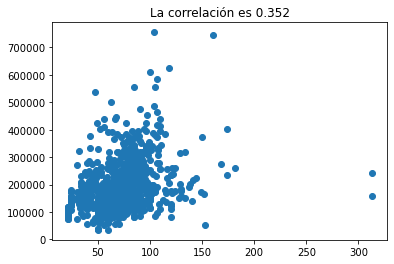

In [30]:
plt.scatter(x='LotFrontage', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset[~pd.isna(dataset["LotFrontage"])]["SalePrice"], dataset[~pd.isna(dataset["LotFrontage"])]["LotFrontage"])[0],3)}')


<AxesSubplot:>

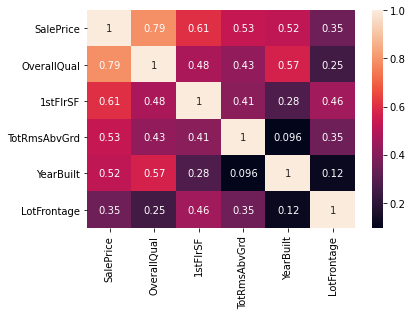

In [31]:
sns.heatmap(dataset.corr(), annot = True)
